In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np

In [2]:
# Function to plot temperature using cartopy
def contour_plot(ds):
    # Specify projection
    crs = ccrs.PlateCarree()

    # Create figure and axes
    fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs})

    # Specify variables
    X = ds['lon']
    Y = ds['lat']
    Z = ds.squeeze()

    # Create contour plot of SST
    im = ax.contourf(X,Y,Z,transform=crs)

    # Add grid lines, coastlines
    ax.gridlines()
    ax.coastlines()

    # Set colorbar
    cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05)
    cbar.set_label('$^\circ\,K$',fontsize=12)

In [3]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/GFDL_LEs/ATM/'
experiment = 'RCP85'
filename = '/t_ref_max.rcp85.ens*.1950_2100.nc'
paths = rootdir+experiment+filename

# Load data from matching files
data = xr.open_mfdataset(paths,combine='nested',concat_dim='ensemble')

Text(0.5, 1.0, 'Ensemble Mean Max Temperature: 2099')

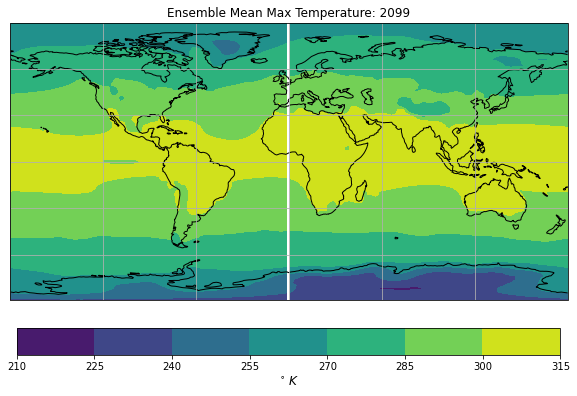

In [5]:
# Calculate ensemble mean max temperature
ds_mean = data.isel(time=slice(-365,None)).mean(dim='time').mean(dim='ensemble')

# Plot mean max temperature
contour_plot(ds_mean['t_ref_max'])
plt.title('Ensemble Mean Max Temperature: 2099')